In [1]:
import matplotlib 
from scholte import *
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import matplotlib.pyplot as plt
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
kobs,fobs=load_dispersion_observations()

In [11]:
kobs,fobs=load_dispersion_observations()

h =  [0.100, 0.005, 0.010, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.0]
vs = np.array([0, 0.0233, 0.0522, 0.0906, 0.125 , 0.20 , 0.25, 1.5, 1.5, 1.5])
vp = np.ones_like(vs) * 1.6
vp[0]=1.5
rho = np.ones_like(vs) * 1.5
rho[0]=1
f,k = pysurf96(h,vp,vs,rho)

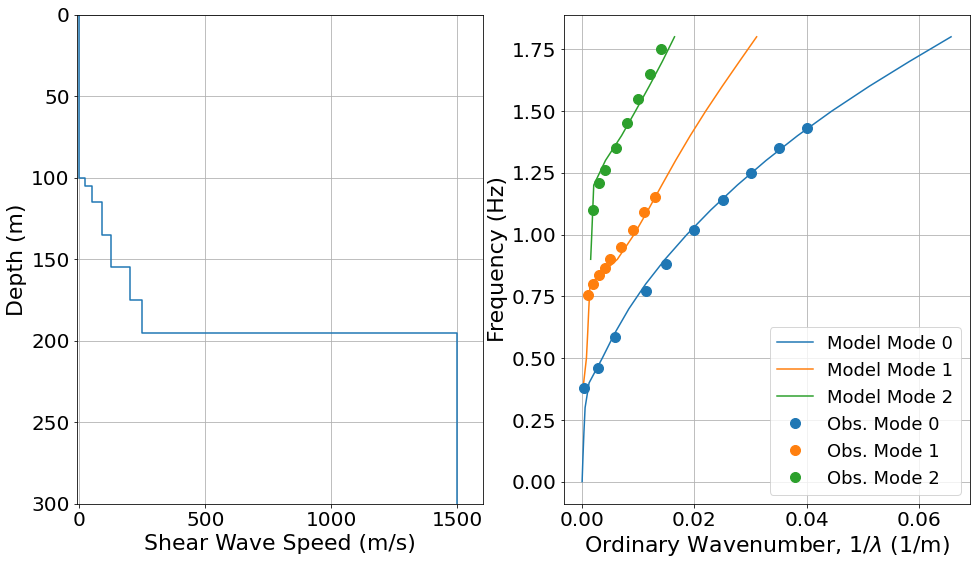

In [12]:
fig,ax=plt.subplots(1,2,figsize=(16,9))
fig.patch.set_facecolor('w')
plt.subplot(121)

vs_input = 1000*np.hstack([vs,vs[-1],vs[-1]])
z = np.hstack([0,np.cumsum(h)*1e3,300])
plt.step(vs_input,z,label='Vs (km/s)')
# plt.step(p,z,label='Vp (km/s)')
# plt.step(rho,z,'--',label='Density (kg/m**3)')
plt.ylim([max(z),0])

plt.grid()
# plt.legend(fontsize=18)
plt.ylabel('Depth (m)',fontsize=22)
plt.xlabel('Shear Wave Speed (m/s)',fontsize=22)

plt.xlim([-10, 1600])

plt.subplot(122)
ind = 0
for kk,ff in zip(k,f):
    plt.plot(kk,ff,'-',label=f'Model Mode {ind}',markersize=12,c=f'C{ind}')
    ind = ind+1
ind = 0
for kk,ff in zip(kobs,fobs):
    plt.plot( kk , ff, 'o' , label=f'Obs. Mode {ind}',markersize=10,c=f'C{ind}')
    ind = ind+1
plt.ylabel('Frequency (Hz)',fontsize=22)
plt.xlabel(r'Ordinary Wavenumber, $1/\lambda$ (1/m)',fontsize=22)



plt.legend(fontsize=18)
plt.grid()
# if save:
#     plt.savefig('model.eps')
# else:
plt.show()

In [5]:
# Four layer model -- tuned for one mode!
# h =  [0.100, 0.005, 0.010, 0.025, 0.0]
# vs = [0, 0.038, 0.043, 0.080, 0.600]
# vp = [1.5,1.6,1.6,1.6,1.6]
# rho= [1,1.5,1.5,1.5,1.5]

# Three-layer model
# h =  [0.100, 0.005, 0.035, 0.0]
# vs = [0, 0.024, 0.06,  15.00]
# vp = [1.5,1.6,1.6,16.0]
# rho= [1,1.5,1.5,1.5]